 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
import pandas as pd

In [3]:
whale_returns = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_returns = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading s&p returns
sp_returns = Path("sp_tsx_history.csv")
sp_returns = pd.read_csv(sp_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_returns.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
#check the data Types 
sp_returns.dtypes


Close    object
dtype: object

In [11]:
# Fix Data Types
sp_returns["Close"] = sp_returns["Close"].str.replace("$", "")
sp_returns["Close"] = sp_returns["Close"].str.replace(",", "")
sp_returns["Close"] = sp_returns["Close"].astype("float")
sp_returns.dtypes

<ipython-input-11-10dd855c5a88>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_returns["Close"] = sp_returns["Close"].str.replace("$", "")


Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp_daily_returns = sp_returns['Close'].pct_change()
sp_daily_returns.head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Close, dtype: float64

In [13]:
# Drop nulls
sp_returns = sp_returns.dropna().copy()
sp_returns.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns = sp_returns.rename(columns={'Close': 'S&P Close'}, inplace=False)
print(sp_returns)

            S&P Close
Date                 
2012-10-01   12370.19
2012-10-02   12391.23
2012-10-03   12359.47
2012-10-04   12447.68
2012-10-05   12418.99
...               ...
2019-12-20   17118.44
2019-12-23   17128.71
2019-12-24   17180.15
2019-12-27   17168.21
2019-12-30   17098.56

[1818 rows x 1 columns]


In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# set date as index 

combined_df = pd.concat([whale_returns, algo_returns, sp_daily_returns], axis="columns", join="inner")
combined_df = combined_df.sort_index()
combined_df.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", 
                       "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX 60"]
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

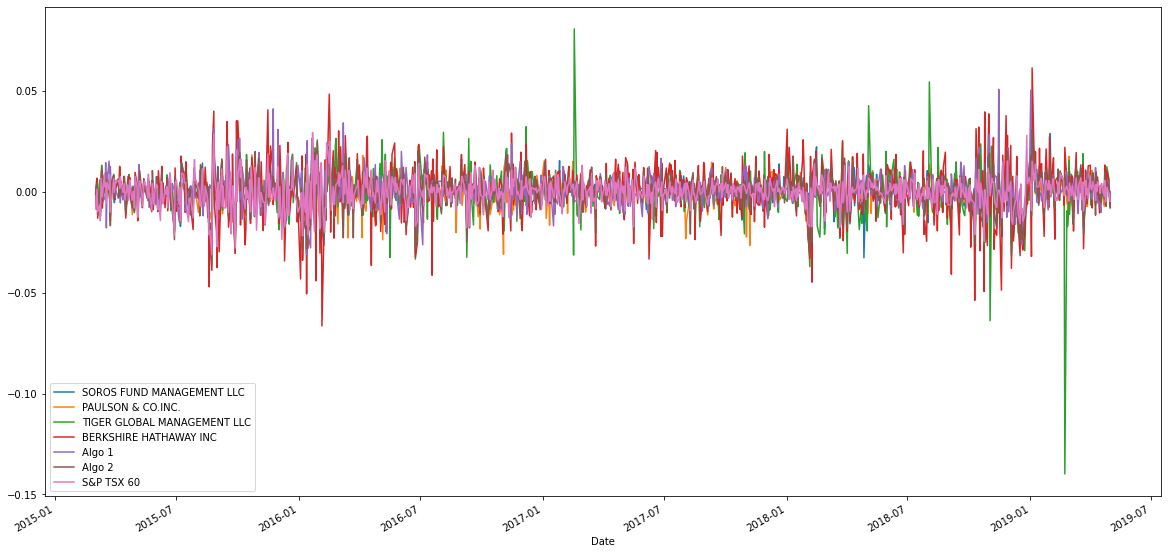

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

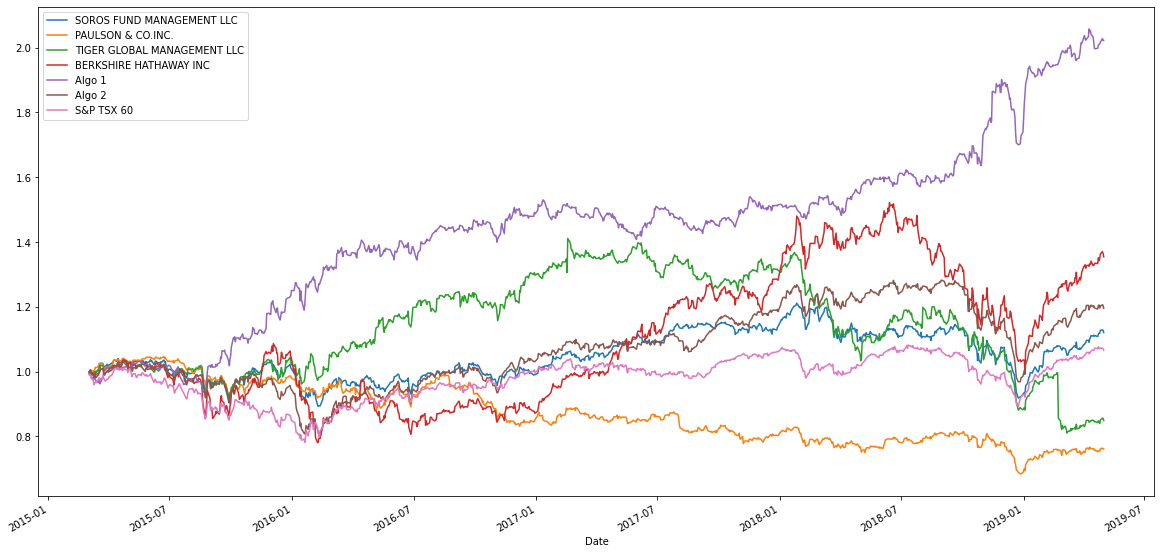

In [17]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

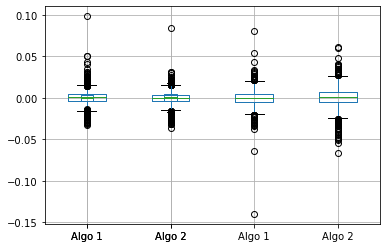

In [18]:
# Box plot to visually show risk
import seaborn as sns
whale_returns.boxplot()
algo_returns.boxplot()


<AxesSubplot:>

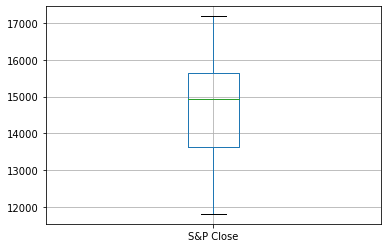

In [19]:
sp_returns.boxplot()

## Calculate Standard Deviations 


In [20]:
# Calculate the daily standard deviations of all portfolios
risk = combined_df.std()
risk

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
# s&p TSX60 sandard deviation
sp_tsx_risk = sp_daily_returns.std()
sp_tsx_risk


0.006637362556692504

In [22]:
# Determine which portfolios are riskier than the S&P TSX 60
whale_risk =whale_returns.std()
whale_risk

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [23]:
# comparare whale_risk with S&P TSX 60

risk_comparison = []
for i in whale_risk:
    if i > sp_tsx_risk:
        risk_comparison.append('risker than S&P 60')
    else:
        risk_comparison.append('less risker than S&P 60')
risk_comparison

['risker than S&P 60',
 'risker than S&P 60',
 'risker than S&P 60',
 'risker than S&P 60']

In [24]:
# Determine which portfolios are riskier than the S&P TSX 60
algo_risk = algo_returns.std()
algo_risk


Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [25]:
# comparare algo_risk with S&P TSX 60

for i in algo_risk:
    if i > sp_tsx_risk:
        print("algo 1 risker rthan S&P TSX 60")
    else:
        print("algo 2 less risker than S&P TSX 60")



algo 1 risker rthan S&P TSX 60
algo 1 risker rthan S&P TSX 60


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_sd = risk * np.sqrt(252)
annual_sd

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

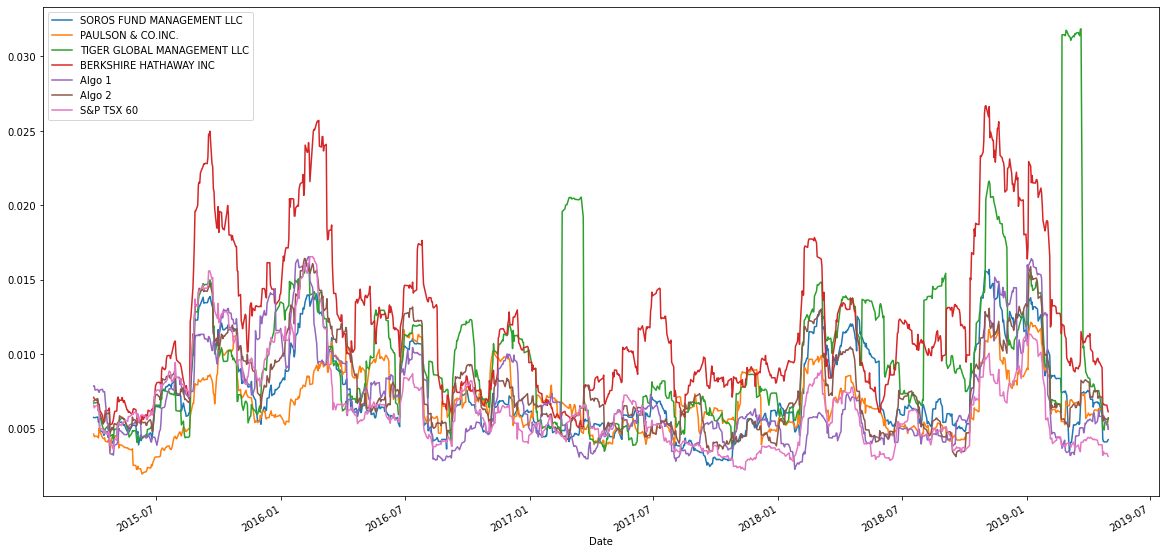

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sma_21 = combined_df.rolling(window = 21).std()

# Plot the rolling standard deviation

sma_21.plot(figsize=(20, 10))

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation = combined_df.corr()

# Display correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

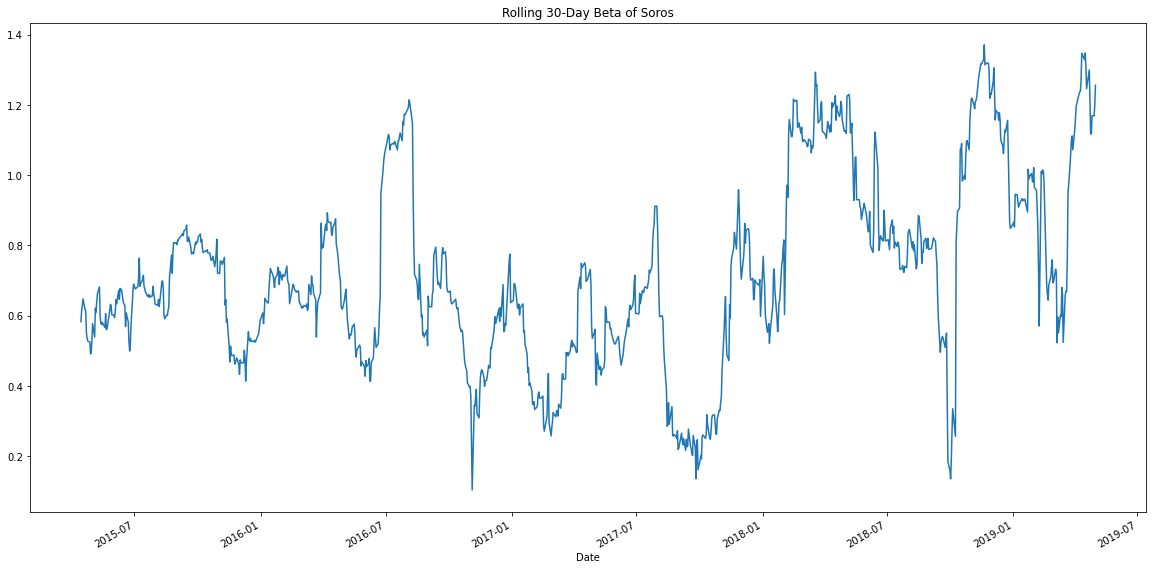

In [29]:
# Calculate covariance of a single portfolio
soros_covariance =combined_df["SOROS FUND MANAGEMENT LLC"].cov(combined_df["S&P TSX 60"])
rolling_soros_covariance = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=30).cov(combined_df["S&P TSX 60"])

#extra 
paulson_covariance =combined_df["PAULSON & CO.INC."].cov(combined_df["S&P TSX 60"])
tiger_covariance =combined_df["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_df["S&P TSX 60"])
berkshire_covariance =combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["S&P TSX 60"])
algo1_covariance =combined_df["Algo 1"].cov(combined_df["S&P TSX 60"])
algo2_covariance =combined_df["Algo 2"].cov(combined_df["S&P TSX 60"])

# Calculate variance of S&P TSX
variance = combined_df["S&P TSX 60"].var()
variance
rolling_variance = combined_df["S&P TSX 60"].rolling(window=30).var()

# Computing beta

rolling_soros_beta = rolling_soros_covariance / rolling_variance


# Plot beta trend
ax = rolling_soros_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of Soros")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21)


ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio1 = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio1

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:>

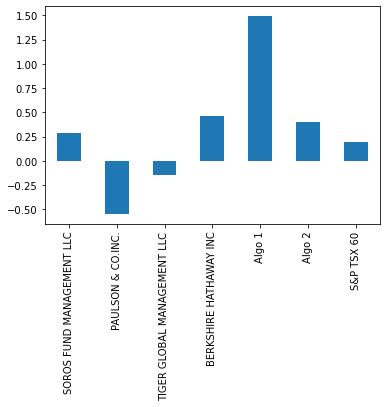

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio1.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

##### Answer: as the same return (10%) the higher the Beta the higher the risk, so S&P 60 has lower risk. The market(s&p 60) is performing well compare with whales portfolio. However, in whales portfolio, some of the stock gets negative sharpe ratios which it is not a good. 


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [33]:
# Reading data from 1st stock
# Reset Date index
SHOP_returns = Path("shop_historical.csv")
SHOP_returns = pd.read_csv(SHOP_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
SHOP_returns.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [34]:
# Reading data from 2nd stock
# Reset Date index
OTEX_returns = Path("otex_historical.csv")
OTEX_returns = pd.read_csv(OTEX_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
OTEX_returns.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [35]:
# Reading data from 3rd stock
# Reset Date index
L_returns = Path("l_historical.csv")
L_returns = pd.read_csv(L_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
L_returns.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [36]:
# Combine all stocks in a single DataFrame
combined_df2 = pd.concat([SHOP_returns, OTEX_returns, L_returns], axis="columns", join="inner")
combined_df2

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67


In [37]:
# Reset Date index
# Date alreadas a index 

In [38]:
# Reorganize portfolio data by having a column per symbol
combined_df2.drop(columns=['Symbol'], inplace=True) 
combined_df2.head()
combined_df2.columns = ["SHOP", "OTEX", "L"]
combined_df2

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [39]:
# Calculate daily returns
df2_returns = combined_df2.pct_change()
df2_returns

# Drop NAs
df2_returns = df2_returns.dropna()

# Display sample data
df2_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = df2_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
new_portfolio = pd.concat([combined_df, portfolio_returns], axis="columns", join="inner")
new_portfolio= new_portfolio.sort_index()
new_portfolio.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", 
                       "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX 60", "my_portfolio"]
new_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,my_portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,my_portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
std = df2_returns.std()
std
ann_std = std * np.sqrt(252)
ann_std

SHOP    0.488717
OTEX    0.215132
L       0.152369
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

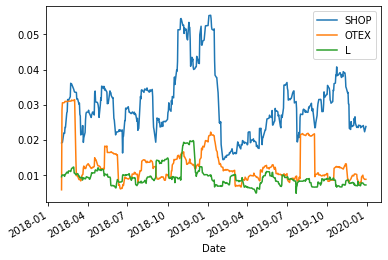

In [44]:
# Calculate rolling standard deviation
sma21 = df2_returns.rolling(window = 21).std()

# Plot rolling standard deviation
sma21.plot()

### Calculate and plot the correlation

<AxesSubplot:>

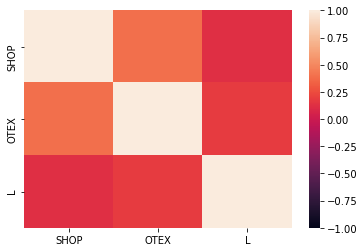

In [45]:
# Calculate and plot the correlation
df2_correlation = df2_returns.corr()
df2_correlation
sns.heatmap(df2_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

1.0330144435926842


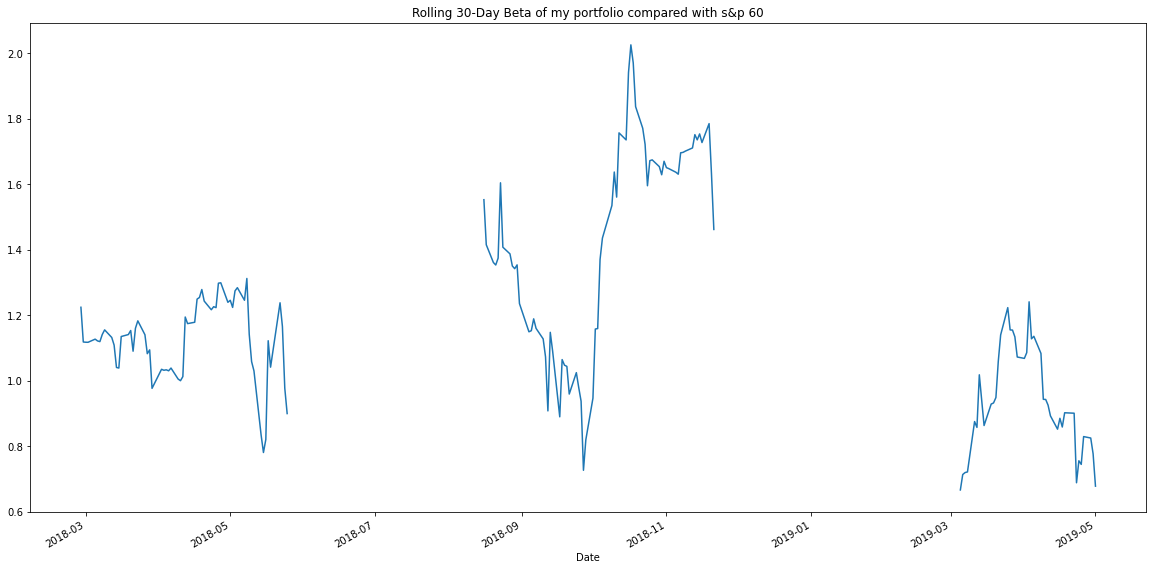

In [46]:
# Calculate and plot Beta

#covariance of my portfolio with S&P60
portfolio_returns_covariance =portfolio_returns.cov(combined_df["S&P TSX 60"])
rolling_portfolio_returns_covariance =portfolio_returns.rolling(window=30).cov(combined_df["S&P TSX 60"])


# Calculate variance of S&P TSX
variance = combined_df["S&P TSX 60"].var()
rolling_variance2 = combined_df["S&P TSX 60"].rolling(window=30).var()

# Calculate Beta
portfolio_returns_beta = portfolio_returns_covariance / variance
rolling_portfolio_returns_beta = rolling_portfolio_returns_covariance / rolling_variance2
print(portfolio_returns_beta)

# Plot beta
ax = rolling_portfolio_returns_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of my portfolio compared with s&p 60")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (df2_returns.mean() * 252) / (ann_std)
sharpe_ratios.head()


SHOP    1.655513
OTEX    0.743512
L       0.570084
dtype: float64

<AxesSubplot:>

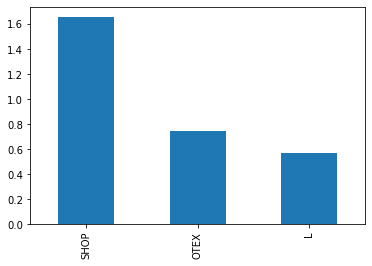

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In my portfolio, SHOP has the highest risk and beta. The higher the risk the higer the return. 